In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("train.csv")


In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
import numpy as np

def init_params():
    """
    Initializes the parameters for a two-layer neural network.

    Returns:
        W1 (ndarray): Weight matrix for the first layer of shape (10, 784).
        b1 (ndarray): Bias vector for the first layer of shape (10, 1).
        W2 (ndarray): Weight matrix for the second layer of shape (10, 10).
        b2 (ndarray): Bias vector for the second layer of shape (10, 1).
    """
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    """
    Applies the ReLU (Rectified Linear Unit) activation function.

    Args:
        Z (ndarray): The input array.

    Returns:
        ndarray: The result of applying ReLU, where all negative values are set to 0.
    """
    return np.maximum(Z, 0)

def softmax(Z):
    """
    Applies the softmax function to an input array.

    Args:
        Z (ndarray): The input array.

    Returns:
        ndarray: The softmax probabilities, summing to 1 across the array.
    """
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    """
    Performs forward propagation through the network.

    Args:
        W1 (ndarray): Weight matrix for the first layer.
        b1 (ndarray): Bias vector for the first layer.
        W2 (ndarray): Weight matrix for the second layer.
        b2 (ndarray): Bias vector for the second layer.
        X (ndarray): Input data.

    Returns:
        Z1 (ndarray): Linear combination output from the first layer.
        A1 (ndarray): Activation output from the first layer.
        Z2 (ndarray): Linear combination output from the second layer.
        A2 (ndarray): Activation output from the second layer (softmax probabilities).
    """
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    """
    Computes the derivative of the ReLU function.

    Args:
        Z (ndarray): The input array.

    Returns:
        ndarray: Derivative of ReLU, 1 where Z > 0, 0 elsewhere.
    """
    return Z > 0

def one_hot(Y):
    """
    Converts labels into a one-hot encoded matrix.

    Args:
        Y (ndarray): Vector of labels.

    Returns:
        ndarray: One-hot encoded matrix with labels as columns.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    """
    Performs backpropagation to compute gradients.

    Args:
        Z1 (ndarray): Linear combination output from the first layer.
        A1 (ndarray): Activation output from the first layer.
        Z2 (ndarray): Linear combination output from the second layer.
        A2 (ndarray): Activation output from the second layer (softmax probabilities).
        W1 (ndarray): Weight matrix for the first layer.
        W2 (ndarray): Weight matrix for the second layer.
        X (ndarray): Input data.
        Y (ndarray): True labels.

    Returns:
        dW1 (ndarray): Gradient of the loss with respect to W1.
        db1 (ndarray): Gradient of the loss with respect to b1.
        dW2 (ndarray): Gradient of the loss with respect to W2.
        db2 (ndarray): Gradient of the loss with respect to b2.
    """
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    """
    Updates the parameters using the gradients.

    Args:
        W1 (ndarray): Weight matrix for the first layer.
        b1 (ndarray): Bias vector for the first layer.
        W2 (ndarray): Weight matrix for the second layer.
        b2 (ndarray): Bias vector for the second layer.
        dW1 (ndarray): Gradient of the loss with respect to W1.
        db1 (ndarray): Gradient of the loss with respect to b1.
        dW2 (ndarray): Gradient of the loss with respect to W2.
        db2 (ndarray): Gradient of the loss with respect to b2.
        alpha (float): Learning rate.

    Returns:
        W1 (ndarray): Updated weight matrix for the first layer.
        b1 (ndarray): Updated bias vector for the first layer.
        W2 (ndarray): Updated weight matrix for the second layer.
        b2 (ndarray): Updated bias vector for the second layer.
    """
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [6]:
def get_predictions(A2):
    """
    Returns the index of the maximum value along an axis in the output layer (A2),
    which represents the predicted class for each input.
    """
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    """
    Calculates the accuracy of predictions by comparing the predicted classes
    with the true labels and returns the proportion of correct predictions.
    """
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    """
    Performs gradient descent optimization to update the weights and biases
    of the neural network. It trains the model for a specified number of iterations
    using the provided learning rate (alpha).
    
    Parameters:
    X (numpy.ndarray): Input data.
    Y (numpy.ndarray): True labels.
    alpha (float): Learning rate.
    iterations (int): Number of iterations for training.

    Returns:
    W1, b1, W2, b2: Updated weights and biases after training.
    """
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 3 1 ... 3 1 5] [4 8 7 ... 6 5 7]
0.03253658536585366
Iteration:  10
[7 2 0 ... 0 2 5] [4 8 7 ... 6 5 7]
0.13234146341463415
Iteration:  20
[7 2 0 ... 4 2 5] [4 8 7 ... 6 5 7]
0.2016829268292683
Iteration:  30
[2 2 0 ... 6 2 5] [4 8 7 ... 6 5 7]
0.2684146341463415
Iteration:  40
[2 8 0 ... 4 8 5] [4 8 7 ... 6 5 7]
0.33707317073170734
Iteration:  50
[2 8 0 ... 4 8 5] [4 8 7 ... 6 5 7]
0.41221951219512193
Iteration:  60
[2 8 7 ... 4 8 5] [4 8 7 ... 6 5 7]
0.47892682926829266
Iteration:  70
[4 8 7 ... 4 8 5] [4 8 7 ... 6 5 7]
0.5294878048780488
Iteration:  80
[4 8 7 ... 4 8 5] [4 8 7 ... 6 5 7]
0.5703658536585365
Iteration:  90
[4 8 7 ... 6 8 5] [4 8 7 ... 6 5 7]
0.6033658536585366
Iteration:  100
[4 8 7 ... 6 8 5] [4 8 7 ... 6 5 7]
0.6330487804878049
Iteration:  110
[4 8 7 ... 6 8 5] [4 8 7 ... 6 5 7]
0.6560487804878049
Iteration:  120
[4 8 7 ... 6 8 2] [4 8 7 ... 6 5 7]
0.6764878048780488
Iteration:  130
[4 8 7 ... 6 8 2] [4 8 7 ... 6 5 7]
0.693
Iteration:  140
[4 8 7 ..

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    """
    Makes predictions for the input data (X) using the trained weights (W1, W2)
    and biases (b1, b2). It performs forward propagation and returns the predicted classes.
    
    Parameters:
    X (numpy.ndarray): Input data.
    W1, b1, W2, b2: Trained weights and biases of the neural network.

    Returns:
    numpy.ndarray: Predicted classes for the input data.
    """
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    """
    Tests the prediction of the neural network on a single example from the training data.
    It displays the image corresponding to the example, prints the predicted class, and
    compares it with the true label.
    
    Parameters:
    index (int): Index of the example in the training data to be tested.
    W1, b1, W2, b2: Trained weights and biases of the neural network.
    """
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  [4]
Label:  4


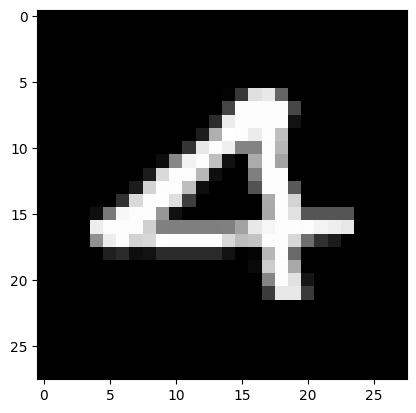

Prediction:  [8]
Label:  8


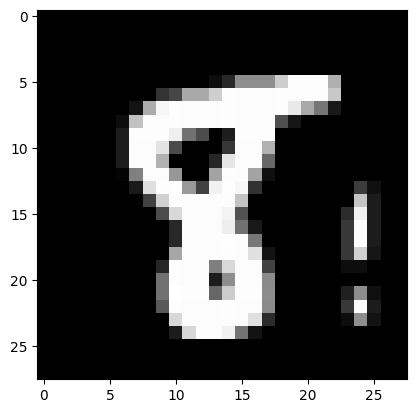

Prediction:  [7]
Label:  7


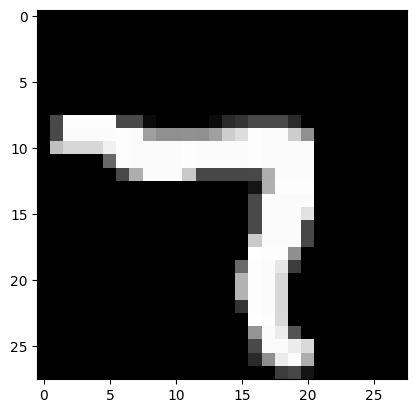

Prediction:  [8]
Label:  8


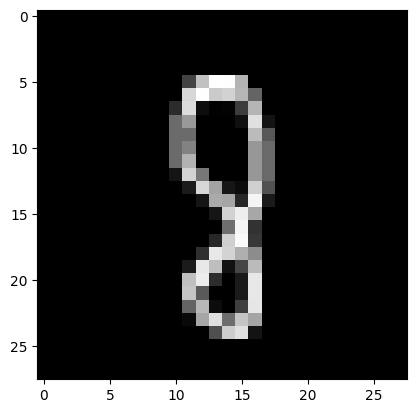

In [13]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [11]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 2 7 4 7 1 2 9 4 3 3 5 7 0 9 3 5 1 2 8 4 5 9 3 1 9 8 2 9 0 7 5 8 5 7 8 6
 5 9 7 6 9 5 7 5 7 5 1 0 2 1 7 1 9 6 1 0 1 2 4 4 2 6 8 3 2 3 2 5 5 8 3 0 4
 8 2 2 6 4 1 9 4 7 2 2 2 1 4 9 8 7 3 9 2 1 7 4 2 2 4 8 4 0 9 3 3 7 0 4 7 8
 3 8 9 3 8 9 7 3 1 5 2 0 2 1 3 0 8 3 0 2 9 4 2 1 2 9 4 6 6 6 1 4 4 2 8 4 6
 0 4 0 8 8 5 3 2 0 9 6 9 3 6 6 1 1 1 2 3 8 1 9 5 4 2 5 9 1 3 6 8 3 9 6 7 0
 1 3 0 0 8 5 6 4 3 3 1 8 7 2 3 8 4 3 1 8 3 6 1 8 2 9 8 0 1 5 5 4 4 0 2 7 7
 4 1 4 8 9 8 4 8 5 2 5 0 0 2 4 1 3 9 7 4 2 6 8 3 9 2 5 8 6 5 5 7 3 3 9 0 8
 2 8 9 9 3 2 3 0 0 7 2 5 5 4 0 0 9 8 9 9 5 9 9 8 6 7 4 4 0 7 7 5 3 7 8 9 8
 2 4 6 1 1 4 3 8 3 1 8 1 0 5 7 5 4 6 0 9 3 3 7 8 1 1 2 7 5 3 8 2 4 2 2 4 9
 0 6 2 9 3 2 8 4 2 0 0 1 5 3 9 3 9 8 7 4 4 1 3 4 0 2 3 8 6 7 3 8 9 4 6 4 2
 1 3 2 9 9 2 0 1 4 4 8 5 1 3 8 3 4 1 8 7 6 2 2 3 9 1 1 5 3 2 9 7 2 2 6 6 6
 2 3 2 9 5 9 6 3 5 8 7 9 4 9 4 4 4 3 0 6 1 3 5 3 7 9 4 3 1 7 3 9 8 6 6 4 2
 2 7 0 7 7 3 9 8 3 0 3 3 4 5 8 8 2 0 1 1 9 6 2 8 1 3 0 5 2 3 8 1 9 4 9 7 1
 1 4 5 6 1 3 4 6 1 9 0 0 

0.829